In [1]:
# Импорт библиотек
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Задания

#### 1) Соберите все данные из папки data_to_combine в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем). В качестве ответа укажите сумму по колонке quantity.

In [2]:
# Указываем директорию, где расположены все каталоги с файлами
tree = os.walk(r'D:\data_analysis\projects\data_to_combine')

# Создаем пустой датафрейм
sales_df = pd.DataFrame()

# Считываем все датасеты и объединяем в итоговый датафрейм
for path, dirs, files in tree:
    if files:                                                                
        for file in files:                                                     
            file_path = '\\'.join([path, file])                                 
            extra_info = path.split('\\')                                      
            new_df = pd.read_csv(file_path)                                  
            new_df['name'] = extra_info[-1]                                      
            new_df['date'] = pd.to_datetime(extra_info[-2])                  
            sales_df = pd.concat([sales_df, new_df], ignore_index=True)      
                                                                             

sales_df.head()

,Unnamed: 0,product_id,quantity,name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03


In [3]:
# Удалим ненужную колонку в итоговом датафрейме
sales_df.drop('Unnamed: 0', axis='columns', inplace=True)
sales_df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


In [4]:
# Рассчитаем сумму по колонке quantity
print(f'Общее количество проданных товаров - {sales_df.quantity.sum()} штук.')

Общее количество проданных товаров - 480 штук.


#### 2) Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [5]:
top_clients = sales_df \
            .groupby('name', as_index=False) \
            .agg({'quantity': 'sum'}) \
            .query('quantity == quantity.max()')

top_clients.name.tolist()

['Alexey_Smirnov', 'Petr_Smirnov']

#### 3) Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:
- **по оси x – идентификаторы товаров (product_id)** 
- **по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)**

#### В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [6]:
top_ten_products = sales_df \
                        .groupby('product_id', as_index=False) \
                        .agg({'quantity': 'sum'}) \
                        .sort_values('quantity', ascending=False) \
                        .head(10)

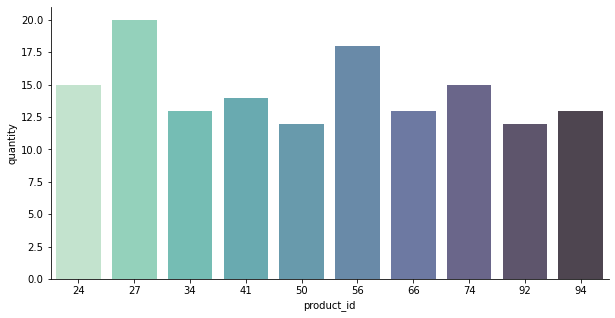

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x='product_id', y='quantity', data=top_ten_products, palette='mako_r', alpha=0.80)
sns.despine()

In [8]:
number = top_ten_products.query('product_id == 56')['quantity'].tolist()[0]
print(f'Количество проданных единиц товара с id 56 - {number}.')

Количество проданных единиц товара с id 56 - 18.


#### 4) Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [9]:
sales_by_days = sales_df \
                    .groupby('date', as_index=False) \
                    .agg({'quantity': 'sum'})

sales_by_days['d_weekday'] = sales_by_days.date.dt.strftime('%d %B')

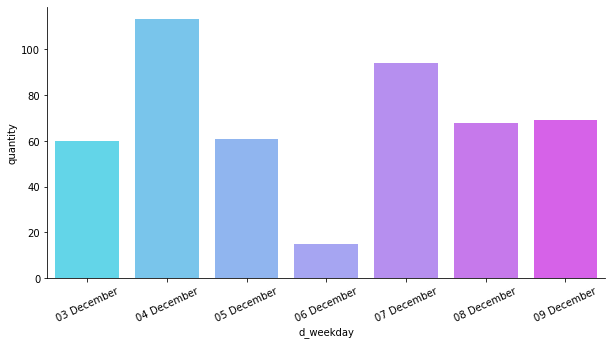

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='d_weekday', y='quantity', data=sales_by_days, palette='cool', alpha=0.80)
plt.xticks(rotation=25)
sns.despine()

**Выводы:**
- максимальное число товаров было продано 4 декабря
- меньше всего товаров было приобретено 6 декабря
- 8 и 9 декабря было продано примерно одинаковое число товаров

#### 5) Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [11]:
sales_df \
        .groupby(['name', 'product_id']) \
        .agg({'date': pd.Series.nunique}) \
        .reset_index() \
        .rename(columns={'date': 'number'}) \
        .query('number > 1')

,name,product_id,number
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
